# Q4

In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline
from keras import models,layers
from tensorflow.keras.layers import Dropout
from keras.applications import ResNet50V2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from keras.layers import Dense,Flatten,GlobalAveragePooling2D
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam

In [2]:
def makedataloader(bs):
    train_data= image_dataset_from_directory(
        "/kaggle/input/imagenetmini-1000/imagenet-mini/train",
        labels='inferred',
        label_mode='categorical',
        class_names=None,
        color_mode='rgb',
        batch_size=bs,
        image_size=(224, 224),
        shuffle=True,
        seed=None,
        validation_split=None,
        subset=None,
        interpolation='bilinear',
        follow_links=False,
        crop_to_aspect_ratio=False,
    )

    val_data= image_dataset_from_directory(
        "/kaggle/input/imagenetmini-1000/imagenet-mini/val",
        labels='inferred',
        label_mode='categorical',
        class_names=None,
        color_mode='rgb',
        batch_size=bs,
        image_size=(224, 224),
        shuffle=True,
        seed=None,
        validation_split=None,
        subset=None,
        interpolation='bilinear',
        follow_links=False,
        crop_to_aspect_ratio=False,
    )
    
    return train_data, val_data


In [3]:
def makemodel(lr):
    base_model=ResNet50V2(
        input_shape=(224,224,3),
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        pooling=None,
        classes=1000,
        classifier_activation="softmax",
    )
    base_model.trainable=False

    pool=GlobalAveragePooling2D()
    dense = layers.Dense(1000, activation='softmax')

    inputs=Input(shape=(224, 224, 3))
    x=preprocess_input(inputs)
    x=base_model(x, training=False)
    x=pool(x)
    #x=Dropout(0.2)(x)
    outputs=dense(x)

    new_model=Model(inputs,outputs)
    #x=models.Sequential([base_model,flat,dense1,dense2])

    new_model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )

    return new_model


In [4]:
td,vd=makedataloader(32)

Found 34745 files belonging to 1000 classes.
Found 3923 files belonging to 1000 classes.


In [5]:
mod=makemodel(0.001)

94668760/94668760 [==============================] - 4s 0us/step


In [6]:
mod.fit(
    x=td,
    epochs=3,
    verbose=1,
    validation_data=vd,
    workers=4,
    use_multiprocessing=True,
)

Epoch 1/3
1086/1086 [==============================] - 199s 174ms/step - loss: 2.8037 - accuracy: 0.4730 - val_loss: 2.4777 - val_accuracy: 0.5238
Epoch 2/3
1086/1086 [==============================] - 112s 103ms/step - loss: 0.5563 - accuracy: 0.8490 - val_loss: 2.5317 - val_accuracy: 0.5289
Epoch 3/3
1086/1086 [==============================] - 112s 103ms/step - loss: 0.1543 - accuracy: 0.9646 - val_loss: 2.5193 - val_accuracy: 0.5526


In [7]:
# cnnmod=mod.layers[3]

# layers = cnnmod.layers
# first_index = None
# last_index = None

# for i, layer in enumerate(layers):
#     if 'conv' in layer.name:
#         if first_index is None:
#             first_index = i
#         last_index = i
        
# print(first_index,last_index)

In [8]:
def getmap(myModel,layerIdx,img):
    tempmodel = Model(inputs=myModel.inputs , outputs=myModel.layers[layerIdx].output)
    features = tempmodel.predict(np.expand_dims(img, axis=0))
    ncol = min(8,int(np.floor(np.sqrt(features.shape[3]))))
    fig, ax = plt.subplots(ncol, ncol,figsize=(2*ncol,ncol*1.5))
    if ncol == 1:
        ax.imshow(features[0,:,:,0],cmap="gray")
    else:
        count = 0
        for i in range(ncol):
            for j in range(ncol):
                ax[j,i].imshow(features[0,:,:,count],cmap="gray")
                ax[j,i].axis("off")
                count += 1
    plt.tight_layout()
    plt.show()


# Expt D, E

1/1 [==============================] - 0s 93ms/step


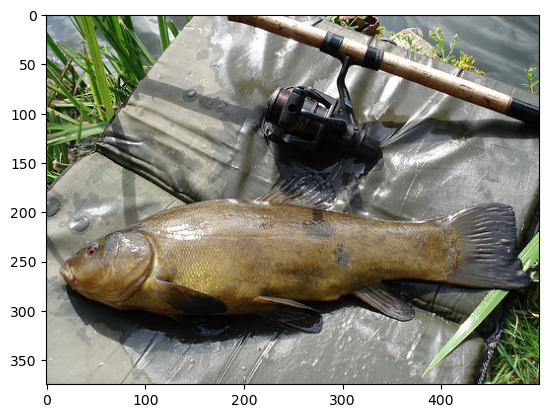

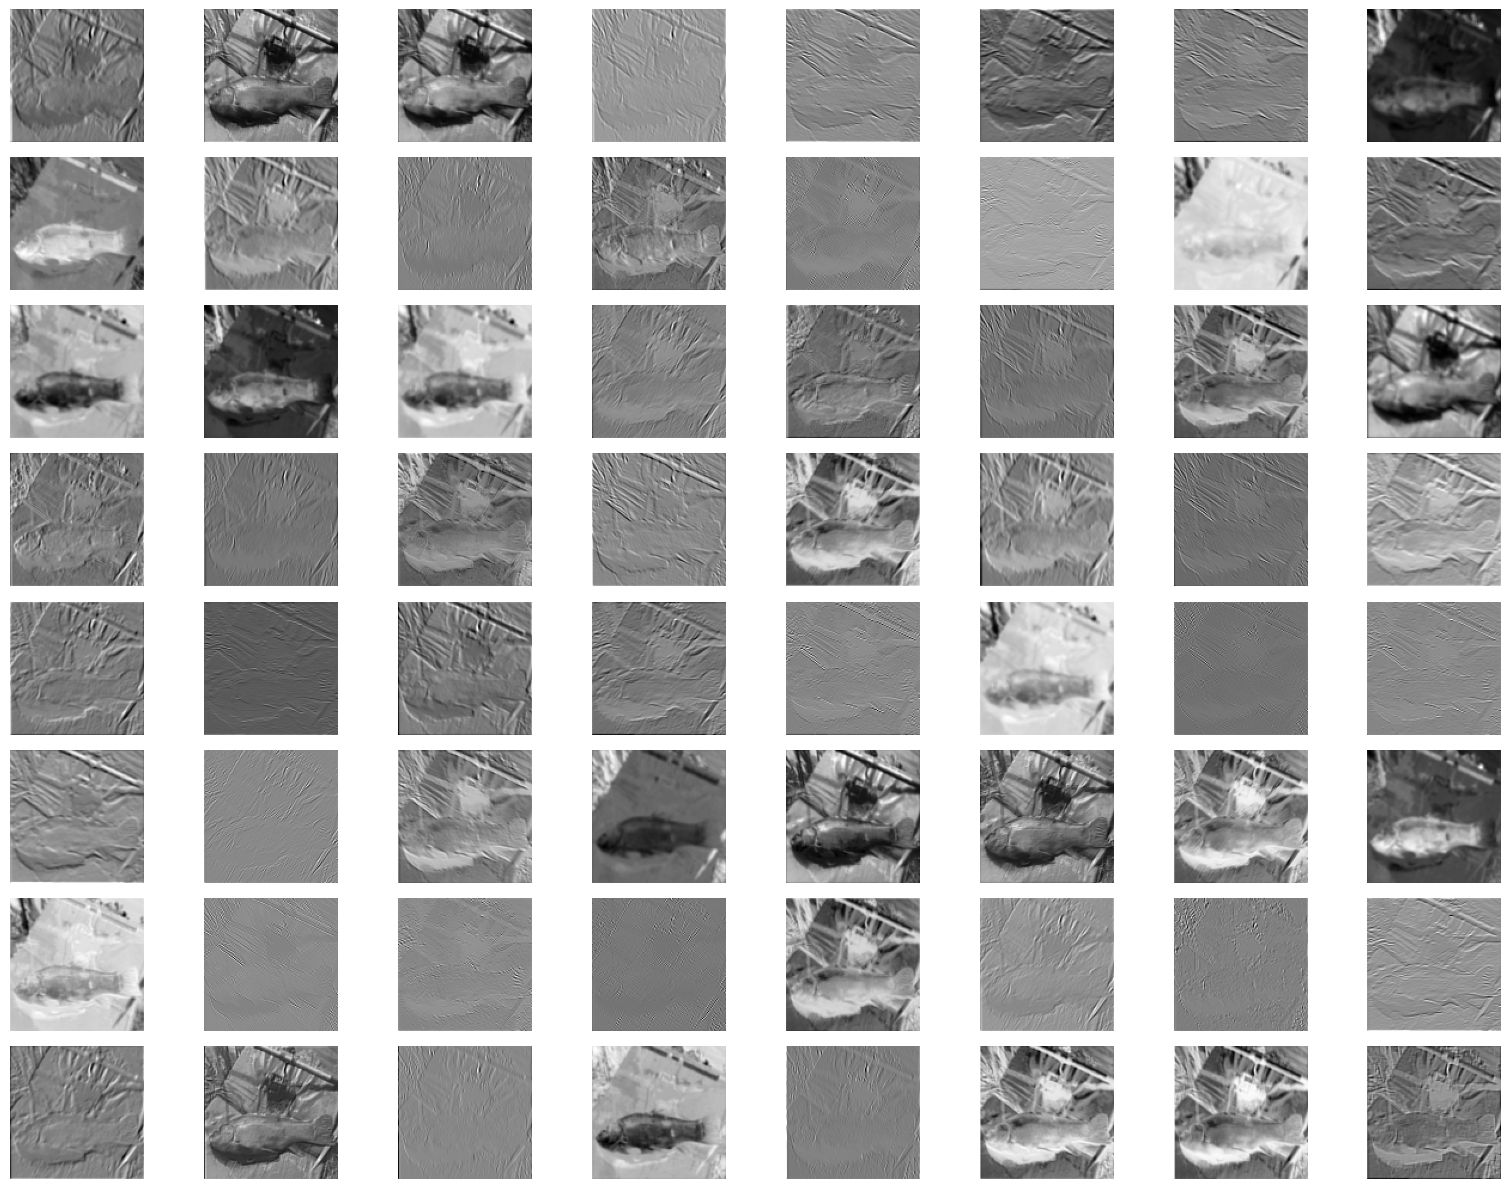

1/1 [==============================] - 1s 508ms/step


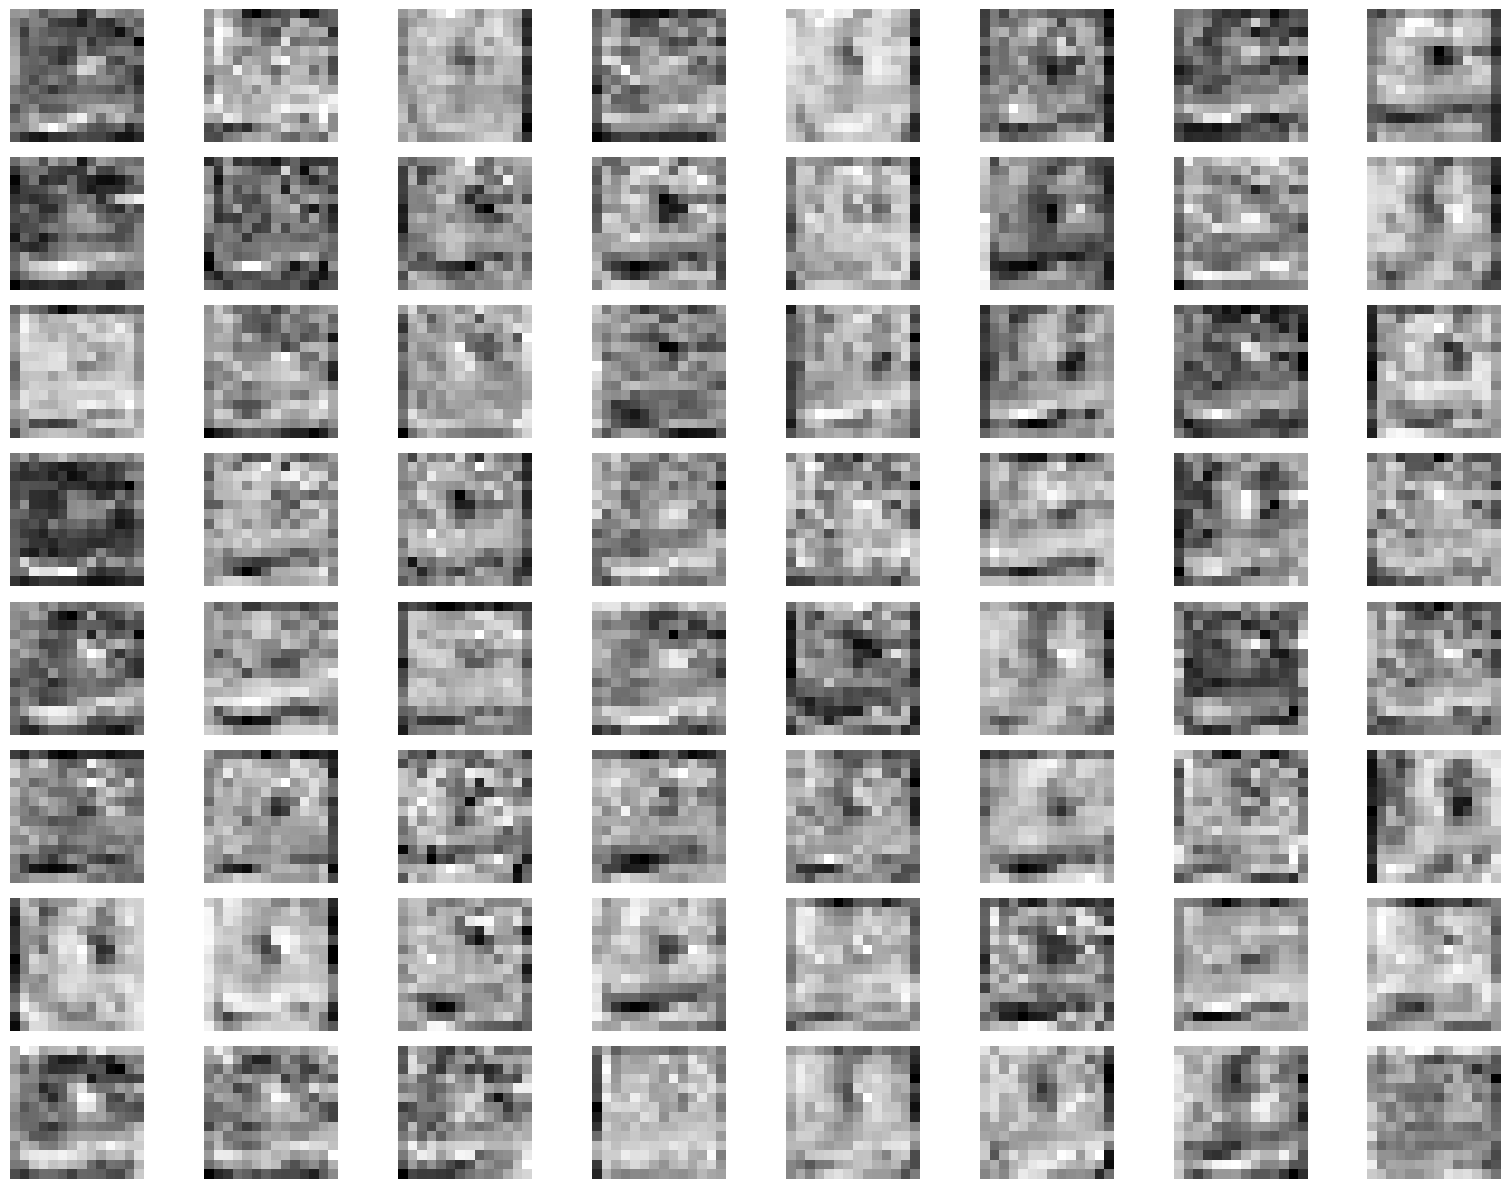

1/1 [==============================] - 1s 854ms/step


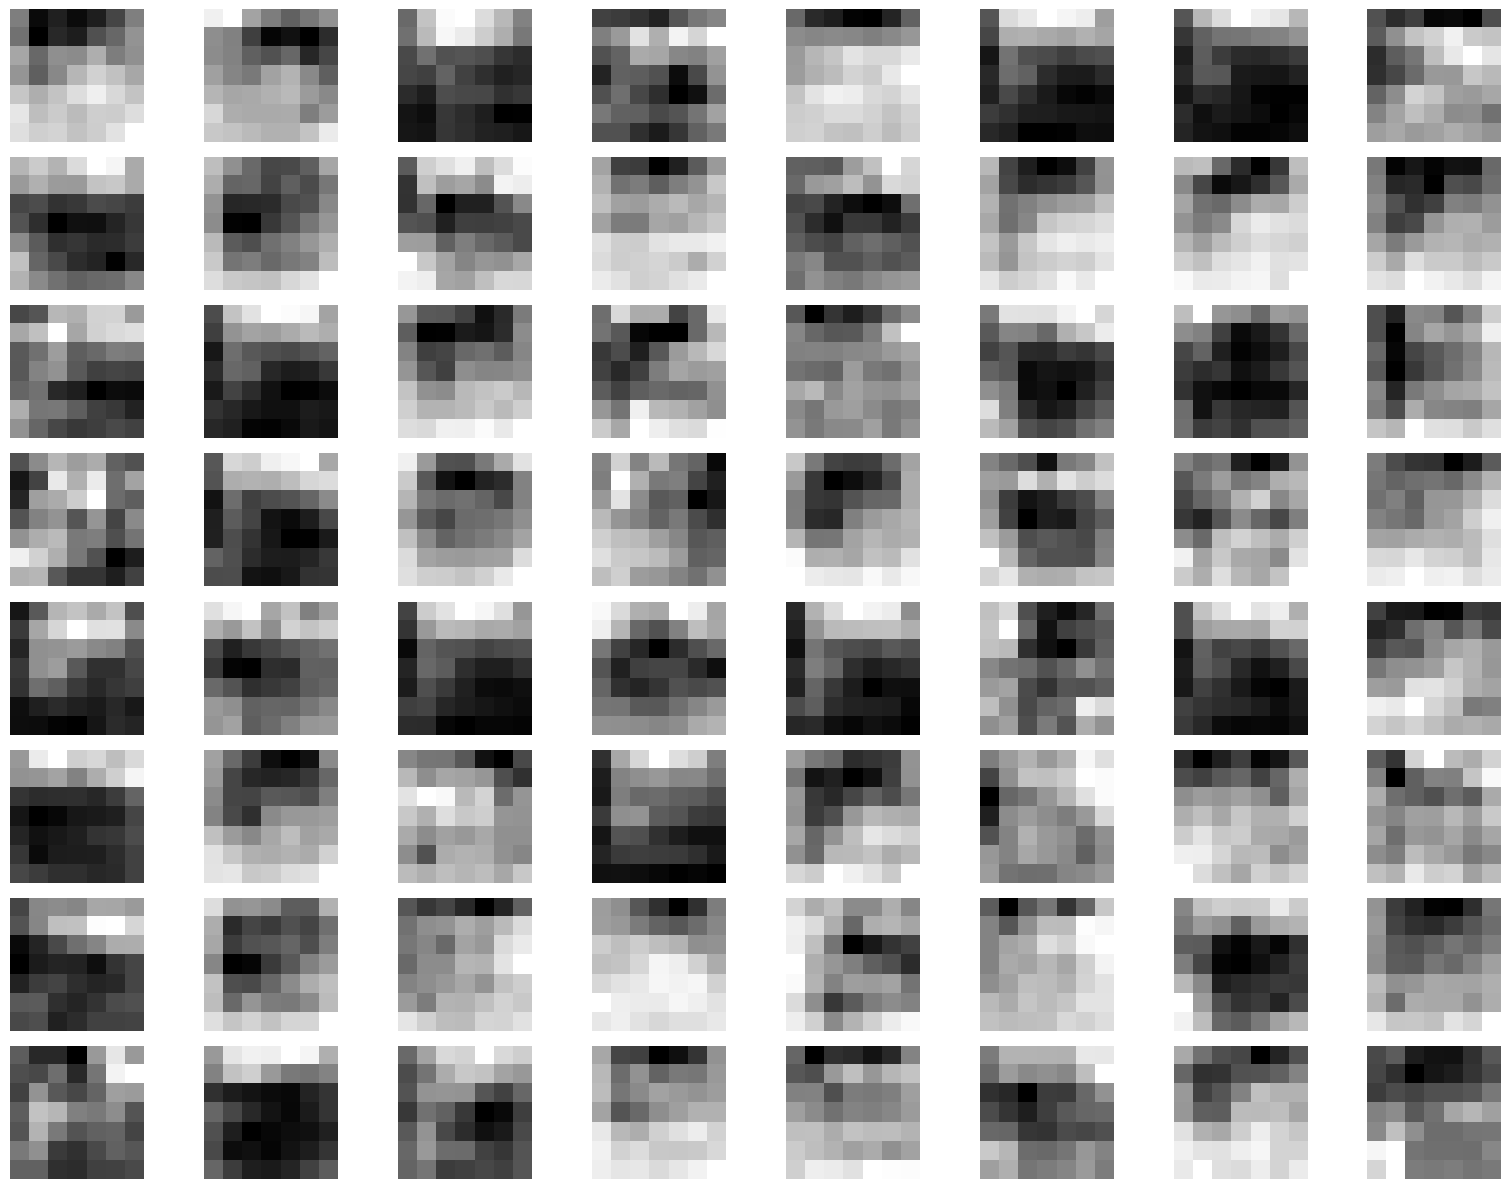

In [9]:
import cv2
img1=plt.imread("/kaggle/input/imagenetmini-1000/imagenet-mini/val/n01440764/ILSVRC2012_val_00009111.JPEG")
plt.imshow(img1)
r_img = cv2.resize(img1, (224, 224), interpolation=cv2.INTER_AREA)

cnnmod=mod.layers[3]
getmap(cnnmod,2,r_img)
getmap(cnnmod,100,r_img)
getmap(cnnmod,186,r_img)

1/1 [==============================] - 0s 41ms/step


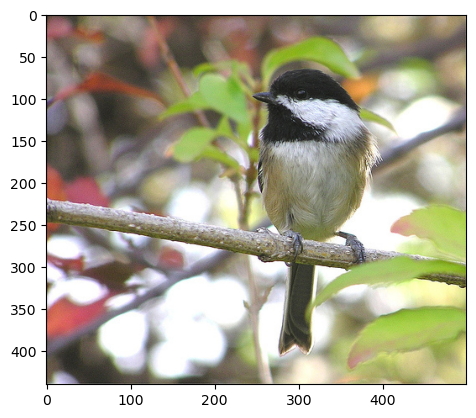

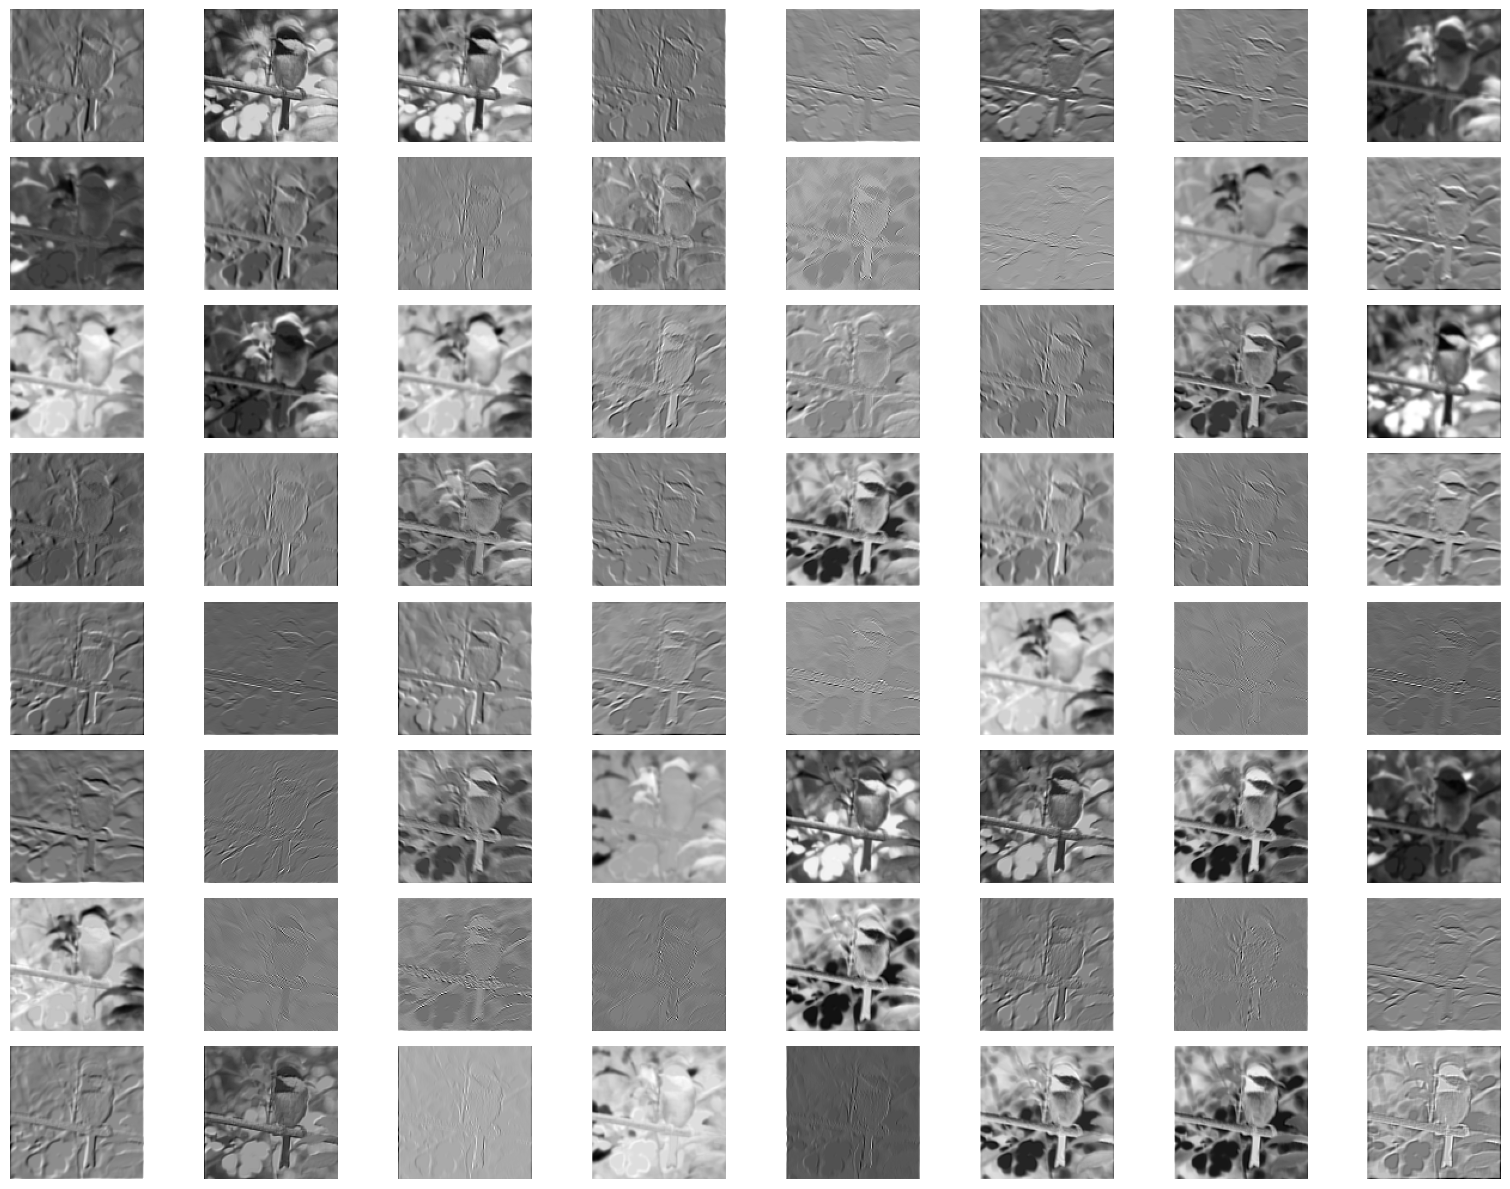

1/1 [==============================] - 0s 419ms/step


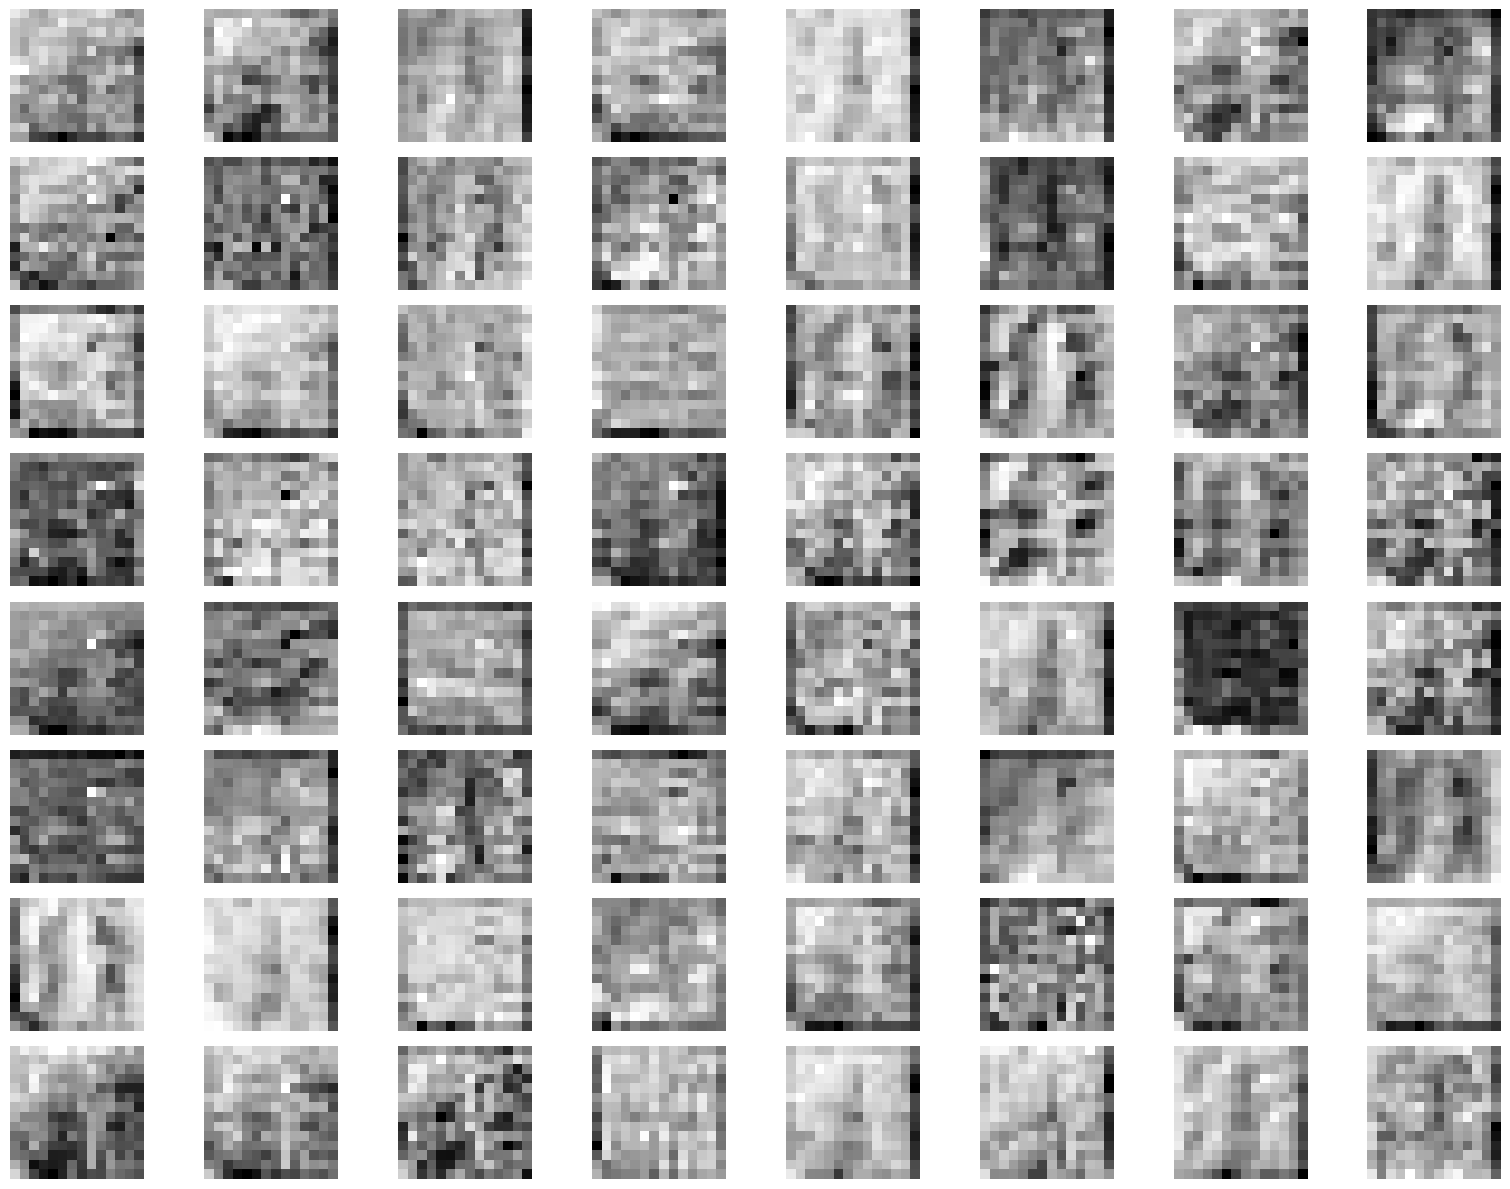

1/1 [==============================] - 1s 801ms/step


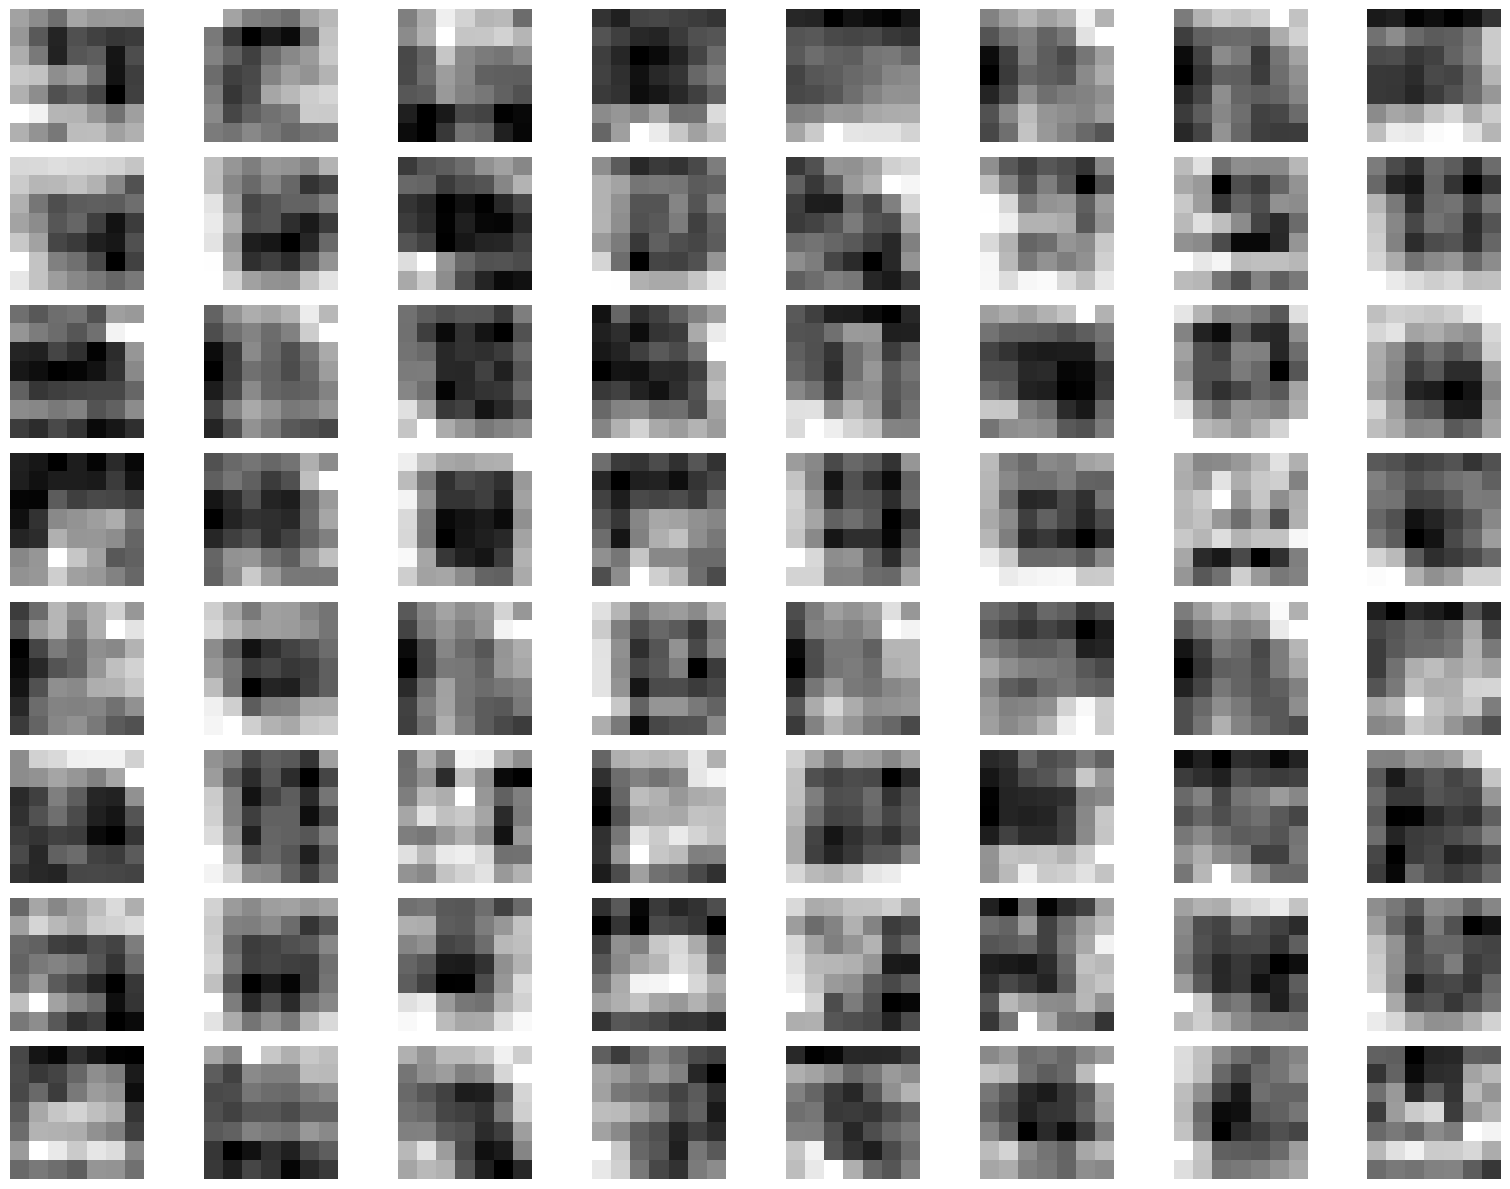

In [10]:
img1=plt.imread("/kaggle/input/imagenetmini-1000/imagenet-mini/val/n01592084/ILSVRC2012_val_00017017.JPEG")
plt.imshow(img1)
r_img = cv2.resize(img1, (224, 224), interpolation=cv2.INTER_AREA)

cnnmod=mod.layers[3]
getmap(cnnmod,2,r_img)
getmap(cnnmod,100,r_img)
getmap(cnnmod,186,r_img)

1/1 [==============================] - 0s 42ms/step


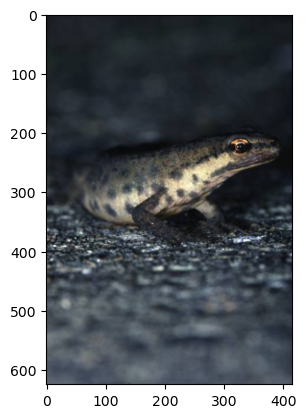

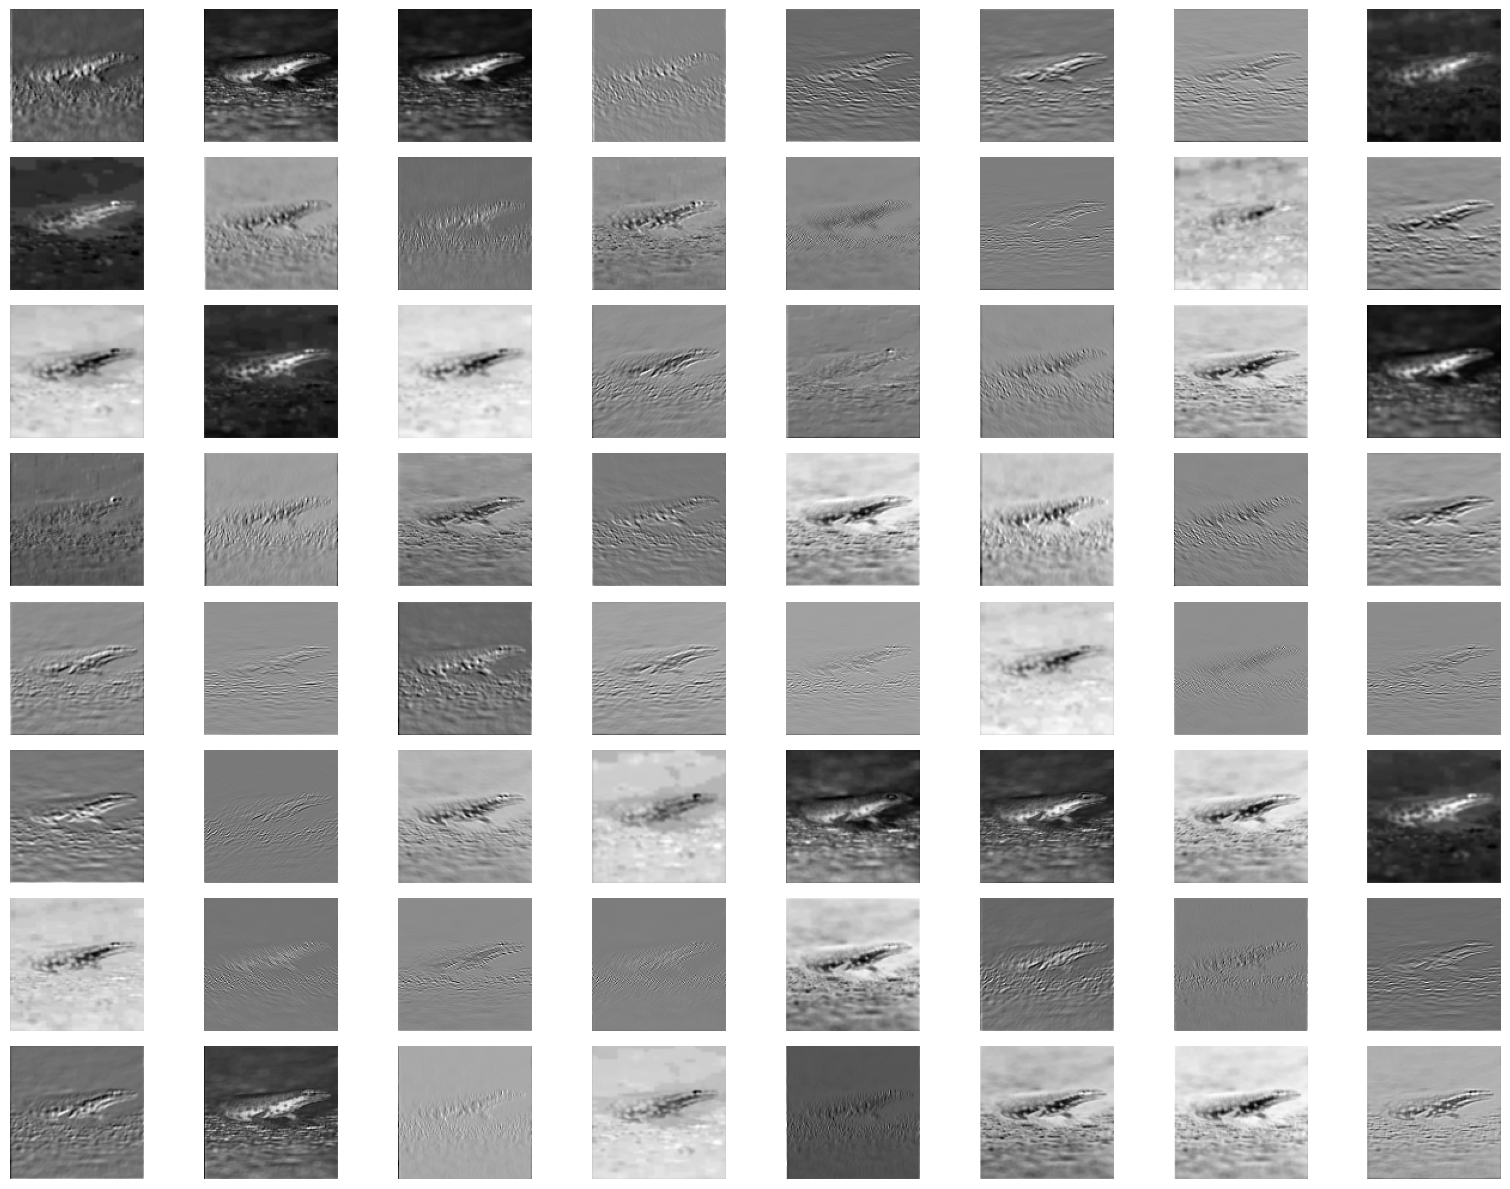

1/1 [==============================] - 0s 412ms/step


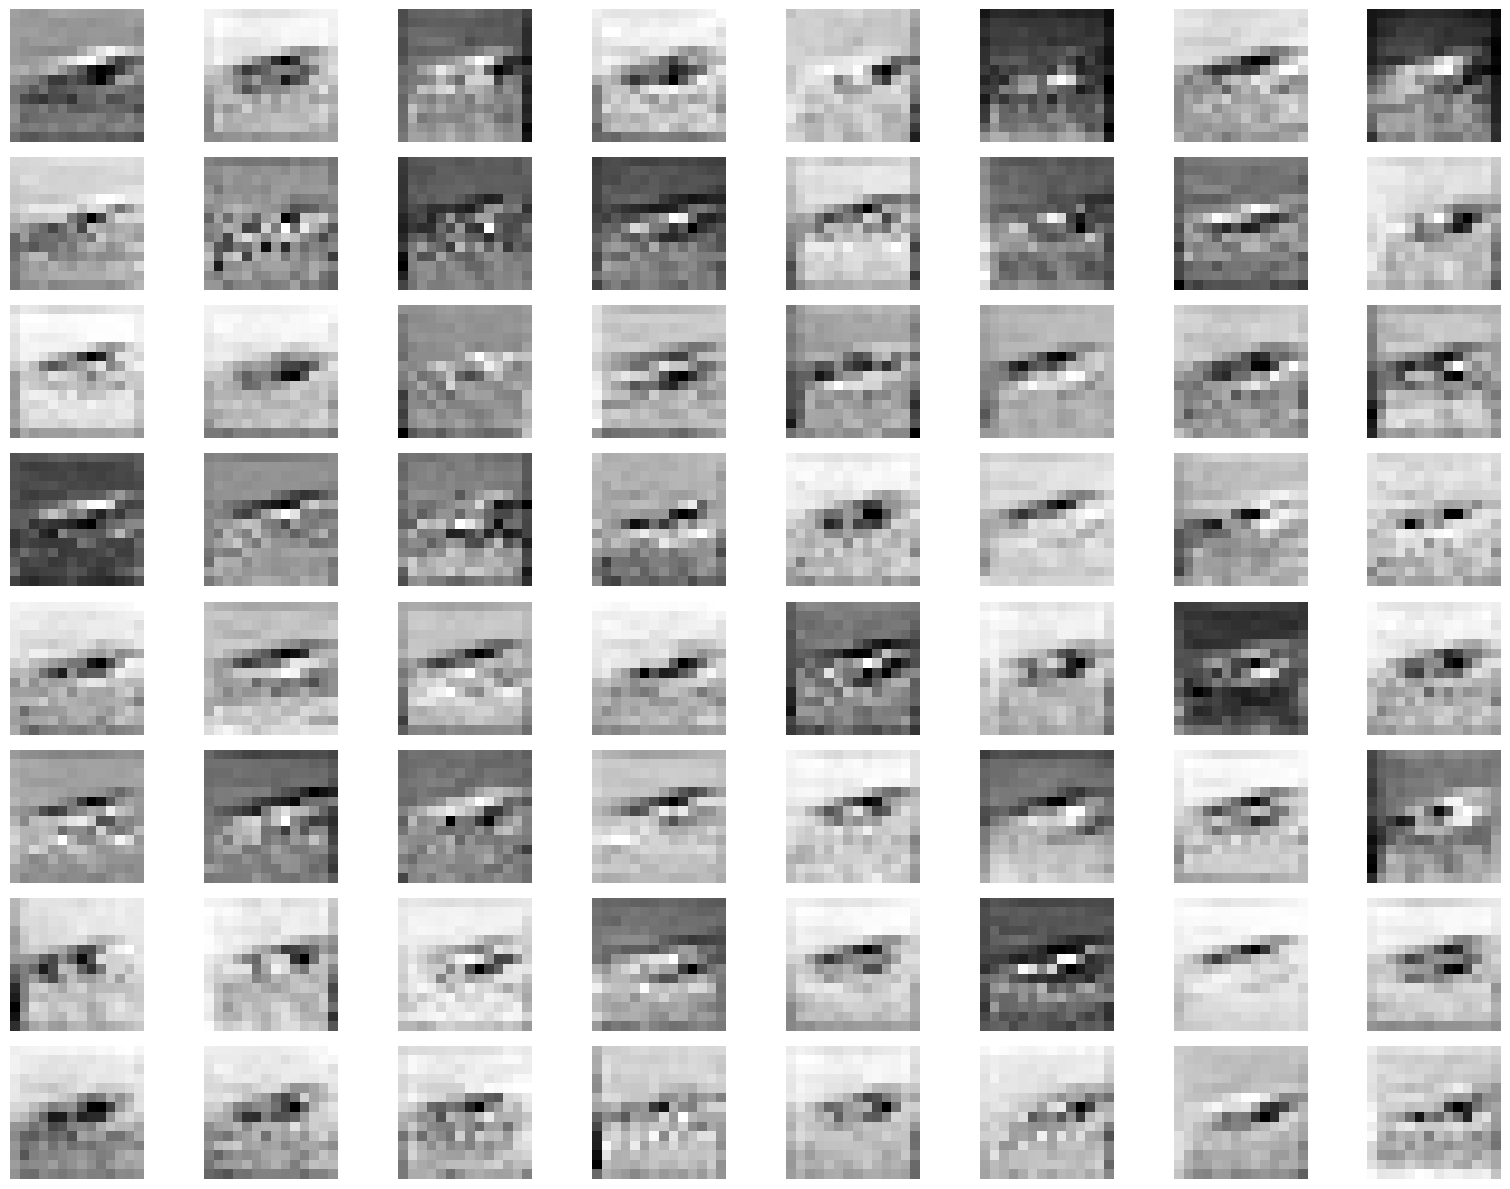

1/1 [==============================] - 1s 1s/step


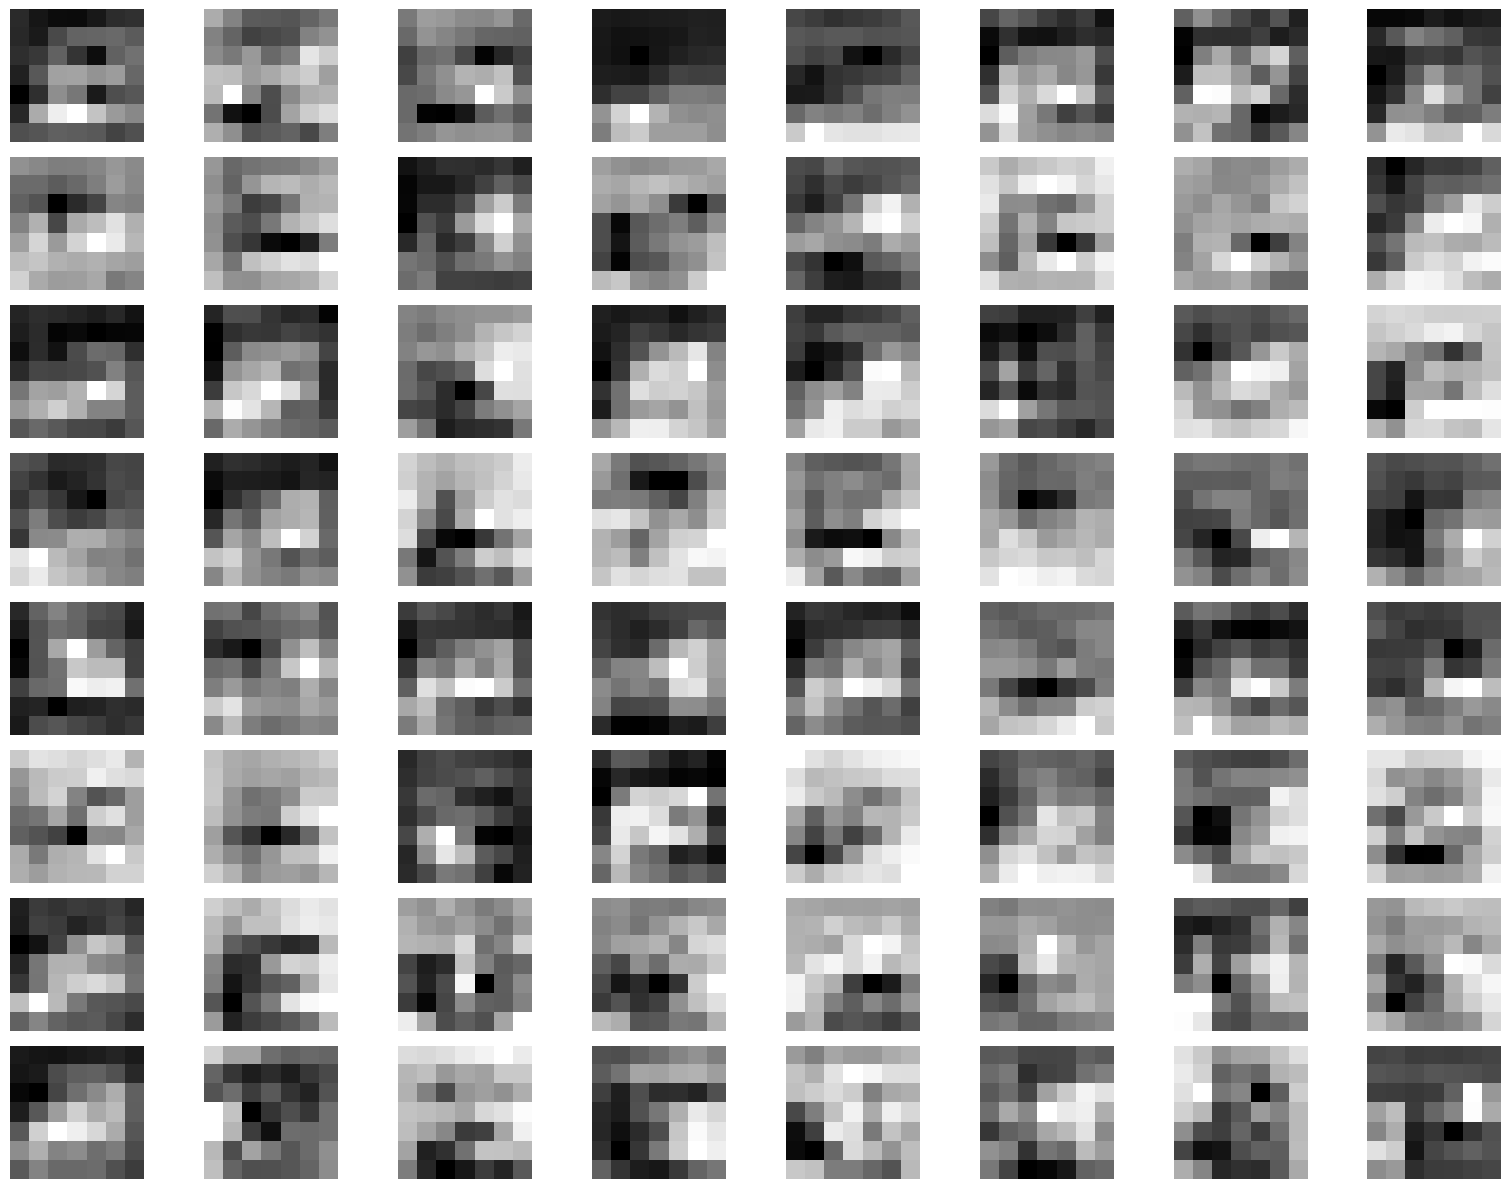

In [11]:
img1=plt.imread("/kaggle/input/imagenetmini-1000/imagenet-mini/val/n01630670/ILSVRC2012_val_00011650.JPEG")
plt.imshow(img1)
r_img = cv2.resize(img1, (224, 224), interpolation=cv2.INTER_AREA)

cnnmod=mod.layers[3]
getmap(cnnmod,2,r_img)
getmap(cnnmod,100,r_img)
getmap(cnnmod,186,r_img)

# Expt F

### LR=0.0001

In [12]:
td,vd=makedataloader(32)
mod=makemodel(0.0001)
mod.fit(
    x=td,
    epochs=3,
    verbose=1,
    validation_data=vd,
    workers=4,
    use_multiprocessing=True,
)

Found 34745 files belonging to 1000 classes.
Found 3923 files belonging to 1000 classes.
Epoch 1/3
1086/1086 [==============================] - 116s 103ms/step - loss: 4.7338 - accuracy: 0.2119 - val_loss: 3.2032 - val_accuracy: 0.4053
Epoch 2/3
1086/1086 [==============================] - 111s 102ms/step - loss: 2.0098 - accuracy: 0.6327 - val_loss: 2.3118 - val_accuracy: 0.5205
Epoch 3/3
1086/1086 [==============================] - 113s 104ms/step - loss: 1.2382 - accuracy: 0.7677 - val_loss: 2.0262 - val_accuracy: 0.5534


### LR=0.01

In [14]:
td,vd=makedataloader(32)
mod=makemodel(0.01)
mod.fit(
    x=td,
    epochs=3,
    verbose=1,
    validation_data=vd,
    workers=4,
    use_multiprocessing=True,
)

Found 34745 files belonging to 1000 classes.
Found 3923 files belonging to 1000 classes.
Epoch 1/3
1086/1086 [==============================] - 127s 114ms/step - loss: 13.9201 - accuracy: 0.3687 - val_loss: 16.1121 - val_accuracy: 0.4412
Epoch 2/3
1086/1086 [==============================] - 112s 103ms/step - loss: 5.6184 - accuracy: 0.6868 - val_loss: 19.0717 - val_accuracy: 0.4540
Epoch 3/3
1086/1086 [==============================] - 113s 103ms/step - loss: 3.3522 - accuracy: 0.7910 - val_loss: 20.4741 - val_accuracy: 0.4711


### Batch Size 16

In [15]:
td,vd=makedataloader(16)
mod=makemodel(0.001)
mod.fit(
    x=td,
    epochs=3,
    verbose=1,
    validation_data=vd,
    workers=4,
    use_multiprocessing=True,
)

Found 34745 files belonging to 1000 classes.
Found 3923 files belonging to 1000 classes.
Epoch 1/3
2172/2172 [==============================] - 125s 56ms/step - loss: 3.0777 - accuracy: 0.4630 - val_loss: 2.8741 - val_accuracy: 0.5149
Epoch 2/3
2172/2172 [==============================] - 122s 56ms/step - loss: 0.6438 - accuracy: 0.8318 - val_loss: 3.0113 - val_accuracy: 0.5233
Epoch 3/3
2172/2172 [==============================] - 121s 55ms/step - loss: 0.2201 - accuracy: 0.9336 - val_loss: 3.2319 - val_accuracy: 0.5297


### Batch Size 64

In [16]:
td,vd=makedataloader(64)
mod=makemodel(0.001)
mod.fit(
    x=td,
    epochs=3,
    verbose=1,
    validation_data=vd,
    workers=4,
    use_multiprocessing=True,
)

Found 34745 files belonging to 1000 classes.
Found 3923 files belonging to 1000 classes.
Epoch 1/3
543/543 [==============================] - 122s 216ms/step - loss: 2.7664 - accuracy: 0.4645 - val_loss: 2.1516 - val_accuracy: 0.5407
Epoch 2/3
543/543 [==============================] - 118s 214ms/step - loss: 0.5895 - accuracy: 0.8495 - val_loss: 2.2053 - val_accuracy: 0.5430
Epoch 3/3
543/543 [==============================] - 124s 226ms/step - loss: 0.1953 - accuracy: 0.9635 - val_loss: 2.2111 - val_accuracy: 0.5547


### Epochs

In [ ]:
td,vd=makedataloader(32)
mod=makemodel(0.001)
mod.fit(
    x=td,
    epochs=9,
    verbose=1,
    validation_data=vd,
    workers=4,
    use_multiprocessing=True,
)

Found 34745 files belonging to 1000 classes.
Found 3923 files belonging to 1000 classes.
Epoch 1/9
1086/1086 [==============================] - 117s 105ms/step - loss: 2.8145 - accuracy: 0.4677 - val_loss: 2.4080 - val_accuracy: 0.5292
Epoch 2/9
1086/1086 [==============================] - 113s 103ms/step - loss: 0.5560 - accuracy: 0.8525 - val_loss: 2.4954 - val_accuracy: 0.5401
Epoch 3/9
1086/1086 [==============================] - 112s 103ms/step - loss: 0.1558 - accuracy: 0.9637 - val_loss: 2.4979 - val_accuracy: 0.5521
Epoch 4/9
1086/1086 [==============================] - 113s 103ms/step - loss: 0.0608 - accuracy: 0.9903 - val_loss: 2.4606 - val_accuracy: 0.5649
Epoch 5/9
1086/1086 [==============================] - 113s 104ms/step - loss: 0.0379 - accuracy: 0.9937 - val_loss: 2.5822 - val_accuracy: 0.5651
Epoch 6/9
1086/1086 [==============================] - 114s 104ms/step - loss: 0.0430 - accuracy: 0.9910 - val_loss: 2.7904 - val_accuracy: 0.5628
Epoch 7/9
1086/1086 [========